In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [23]:
data_path = '../data/updated_cleaned_patient_data.csv'
data = pd.read_csv(data_path)

In [24]:
data_encoded = pd.get_dummies(data, drop_first=True)
x = data_encoded.drop('stroke', axis=1)
y = data_encoded['stroke']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [25]:
clf = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=50, 
    min_samples_leaf=5,
    random_state=42,
)
clf.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,50
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [26]:
train_pred = clf.predict(x_train)
test_pred = clf.predict(x_test)

print("Train Accuracy :", accuracy_score(y_train, train_pred))
print("Validation Accuracy  : ", accuracy_score(y_test, test_pred))

Train Accuracy : 0.8375
Validation Accuracy  :  0.79


              precision    recall  f1-score   support

           0       0.84      0.88      0.86       144
           1       0.64      0.57      0.60        56

    accuracy                           0.79       200
   macro avg       0.74      0.72      0.73       200
weighted avg       0.78      0.79      0.79       200



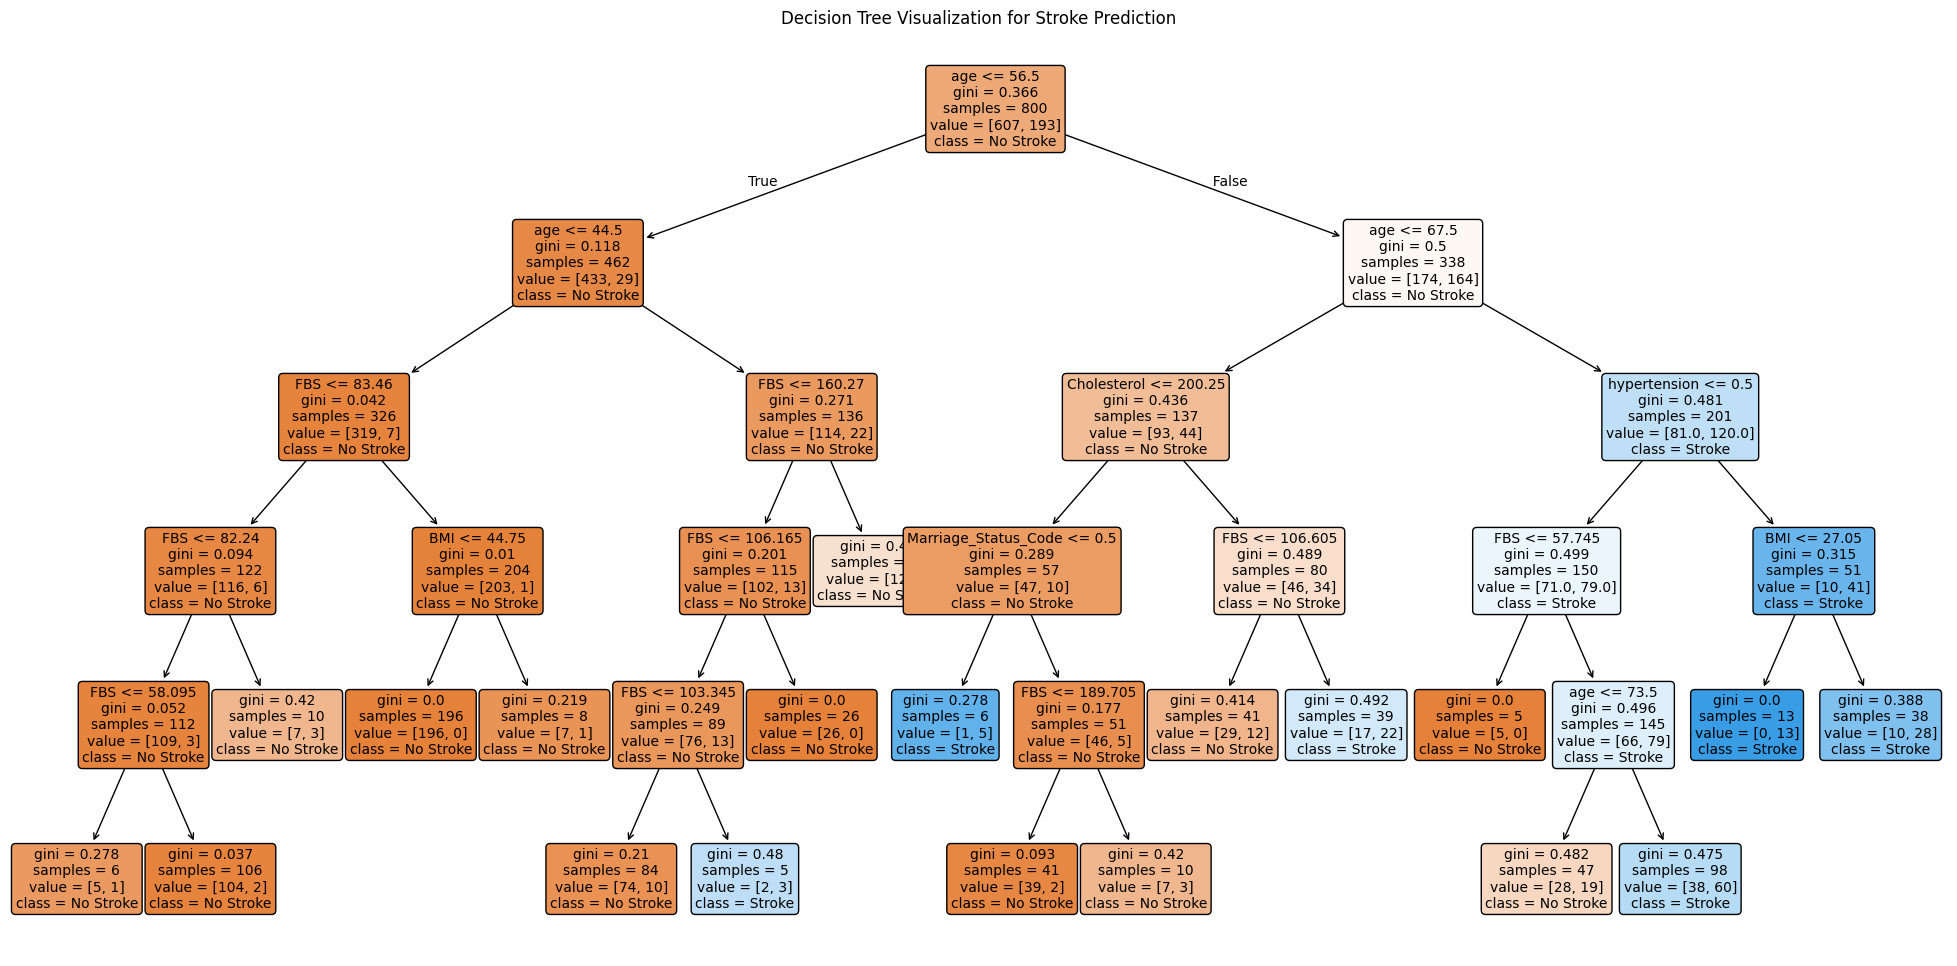

In [27]:
print(classification_report(y_test, test_pred))
#Graph
# 1. ตั้งค่าขนาดของภาพ (ปรับตัวเลขได้ถ้าภาพเล็กไป)
plt.figure(figsize=(25, 12))

# 2. วาดกราฟ
plot_tree(
    clf,              # ใส่โมเดลที่เราฝึกเสร็จแล้ว
    feature_names=x.columns,      # ใส่ชื่อคอลัมน์เพื่อให้รูว่าโหนดนั้นเช็คค่าอะไร
    class_names=['No Stroke', 'Stroke'], # ใส่ชื่อผลลัพธ์ (0=No Stroke, 1=Stroke)
    filled=True,                  # ระบายสีตามความมั่นใจ (สีเข้ม=มั่นใจมาก)
    rounded=True,                 # ทำให้กล่องมน ดูง่ายขึ้น
    fontsize=10                   # ขนาดตัวอักษร
)

# 3. แสดงผล
plt.title("Decision Tree Visualization for Stroke Prediction")
plt.show()